In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

In [2]:
bill_data = pd.read_csv('Billionaire.csv')

In [3]:
bill_data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


In [4]:
bill_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2755 non-null   object 
 1   NetWorth  2755 non-null   object 
 2   Country   2755 non-null   object 
 3   Source    2755 non-null   object 
 4   Rank      2755 non-null   int64  
 5   Age       2676 non-null   float64
 6   Industry  2755 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 150.8+ KB


In [5]:
bill_data.shape

(2755, 7)

In [6]:
bill_data['NetWorth']

0       $177 B
1       $151 B
2       $150 B
3       $124 B
4        $97 B
         ...  
2750      $1 B
2751      $1 B
2752      $1 B
2753      $1 B
2754      $1 B
Name: NetWorth, Length: 2755, dtype: object

In [7]:
bill_data['NetWorth'] = bill_data.NetWorth.apply(lambda x: str(x).replace('B', ''))
bill_data['NetWorth'] = bill_data.NetWorth.apply(lambda x: str(x).replace('$', ''))

In [8]:
bill_data['NetWorth']

0       177 
1       151 
2       150 
3       124 
4        97 
        ... 
2750      1 
2751      1 
2752      1 
2753      1 
2754      1 
Name: NetWorth, Length: 2755, dtype: object

In [9]:
bill_data.rename(columns={'NetWorth' : 'NetWorth(USD_billion)'}, inplace=True)

In [10]:
bill_data

,Name,NetWorth(USD_billion),Country,Source,Rank,Age,Industry
0,Jeff Bezos,177,United States,Amazon,1,57.0,Technology
1,Elon Musk,151,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97,United States,Facebook,5,36.0,Technology
...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,1,China,e-commerce,2674,49.0,Technology
2751,Zhang Yuqiang,1,China,Fiberglass,2674,65.0,Manufacturing
2752,Zhao Meiguang,1,China,gold mining,2674,58.0,Metals & Mining
2753,Zhong Naixiong,1,China,conglomerate,2674,58.0,Diversified


In [11]:
bill_data['NetWorth(USD_billion)'] = bill_data['NetWorth(USD_billion)'].astype(float)
#bill_data['NetWorth(USD_billion)'] = bill_data['NetWorth(USD_billion)'].apply(lambda x: float)

In [12]:
bill_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   2755 non-null   object 
 1   NetWorth(USD_billion)  2755 non-null   float64
 2   Country                2755 non-null   object 
 3   Source                 2755 non-null   object 
 4   Rank                   2755 non-null   int64  
 5   Age                    2676 non-null   float64
 6   Industry               2755 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 150.8+ KB


In [13]:
bill_data.isnull().sum()

Name                      0
NetWorth(USD_billion)     0
Country                   0
Source                    0
Rank                      0
Age                      79
Industry                  0
dtype: int64

In [14]:
bill_data['Age']

0       57.0
1       49.0
2       72.0
3       65.0
4       36.0
        ... 
2750    49.0
2751    65.0
2752    58.0
2753    58.0
2754    54.0
Name: Age, Length: 2755, dtype: float64

In [15]:
bill_data.dtypes

Name                      object
NetWorth(USD_billion)    float64
Country                   object
Source                    object
Rank                       int64
Age                      float64
Industry                  object
dtype: object

In [16]:
bill_data.describe().T

,count,mean,std,min,25%,50%,75%,max
NetWorth(USD_billion),2755.0,4.749220,9.615358,1.0,1.5,2.3,4.2,177.0
Rank,2755.0,1345.663521,772.669811,1.0,680.0,1362.0,2035.0,2674.0
Age,2676.0,63.113602,13.445153,18.0,54.0,63.0,73.0,99.0


## Dealing with missing data

In [17]:
bill_data.isna().sum()

Name                      0
NetWorth(USD_billion)     0
Country                   0
Source                    0
Rank                      0
Age                      79
Industry                  0
dtype: int64

In [18]:
data_missing = bill_data[bill_data.isna().Age]
data_missing

,Name,NetWorth(USD_billion),Country,Source,Rank,Age,Industry
132,Hinduja brothers,14.9,United Kingdom,diversified,133,NaN,Diversified
255,Lam Wai-ying,9.1,Hong Kong,smartphone screens,256,NaN,Manufacturing
268,Chan Tan Ching-fen,8.8,Hong Kong,real estate,269,NaN,Real Estate
285,Anthony von Mandl,8.7,Canada,alcoholic beverages,274,NaN,Food & Beverage
294,Kuldip Singh & Gurbachan Singh Dhingra,8.4,India,paints,294,NaN,Manufacturing
...,...,...,...,...,...,...,...
2580,Lai Baosheng,1.1,China,consumer technology,2524,NaN,Technology
2639,Tseng Sing-ai,1.1,Taiwan,petrochemicals,2524,NaN,Manufacturing
2680,Carmen Daurella Aguilera,1.0,Spain,Coca-Cola bottler,2674,NaN,Food & Beverage
2714,Michael McCain,1.0,Canada,packaged meats,2674,NaN,Food & Beverage


In [19]:
bill_data_Age_drop = bill_data.dropna()
bill_data_Age_drop.shape

(2676, 7)

In [20]:
bill_data.duplicated().sum()

0

## Analysis

### Top 10 Industries by Net Worth

In [21]:
def billionaires(y='',x=''):
    Top_10 = bill_data.groupby(y)[x].sum().reset_index()
    Top_10 = Top_10.sort_values(by= x, ascending = False).head(10)
    return Top_10

In [22]:
# Top_10_Industries = bill_data.groupby('Industry')['NetWorth(USD_billion)'].sum().reset_index()
# Top_10_Industries = Top_10_Industries.sort_values(by= 'NetWorth(USD_billion)', ascending = False)
# Top_10_Industries.head(10)

Top_10_Industries = billionaires(y='Industry', x='NetWorth(USD_billion)')
Top_10_Industries

,Industry,NetWorth(USD_billion)
16,Technology,2456.7
4,Fashion & Retail,1697.6
5,Finance & Investments,1527.9
10,Manufacturing,1119.9
6,Food & Beverage,1029.9
2,Diversified,868.1
13,Real Estate,815.8
8,Healthcare,790.7
11,Media & Entertainment,481.3
0,Automotive,467.5


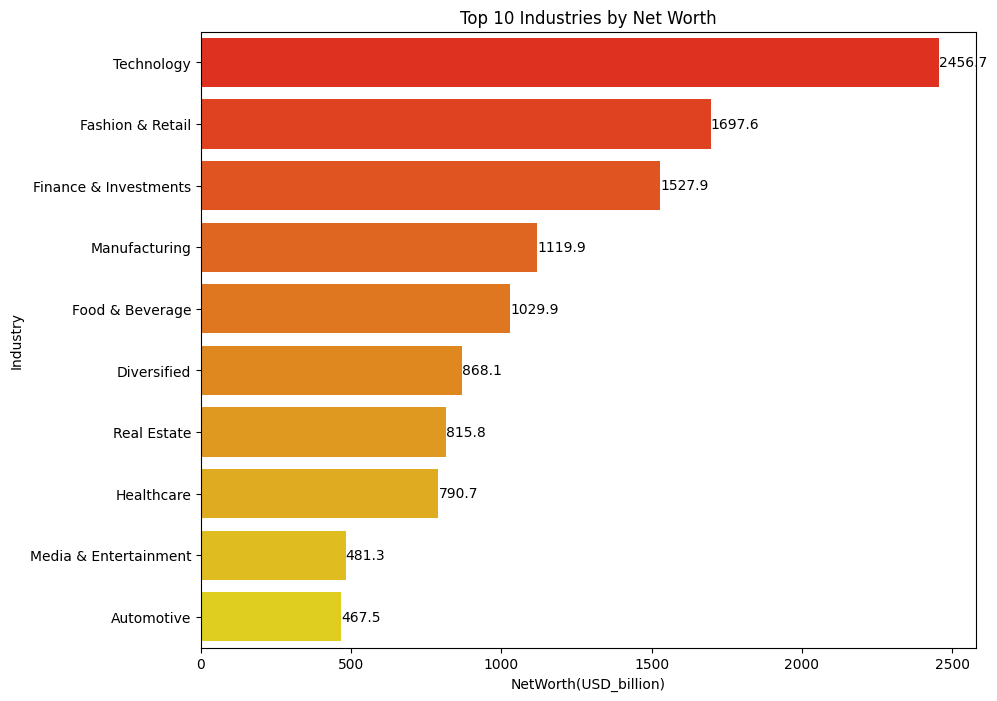

In [23]:
plt.figure(figsize=(10,8))
plt.title('Top 10 Industries by Net Worth')
# sn.barplot(y='Industry', x='NetWorth(USD_billion)', data= Top_10_Industries, palette= 'autumn')
ax = sn.barplot(y='Industry', x='NetWorth(USD_billion)', data= Top_10_Industries, palette= 'autumn')
ax.bar_label(ax.containers[0])
plt.show()

### Top 10 Countries by Net Worth

In [24]:
# Top_10_countries = bill_data.groupby('Country')['NetWorth(USD_billion)'].sum().reset_index()
# Top_10_countries = Top_10_countries.sort_values(by='NetWorth(USD_billion)', ascending = False)
# Top_10_countries.head(10)

Top_10_countries = billionaires(y= 'Country', x= 'NetWorth(USD_billion)')
Top_10_countries

,Country,NetWorth(USD_billion)
66,United States,4398.4
8,China,2531.9
18,Germany,625.5
24,India,596.4
50,Russia,586.0
16,France,512.2
21,Hong Kong,448.2
6,Canada,231.1
29,Japan,225.4
65,United Kingdom,213.9


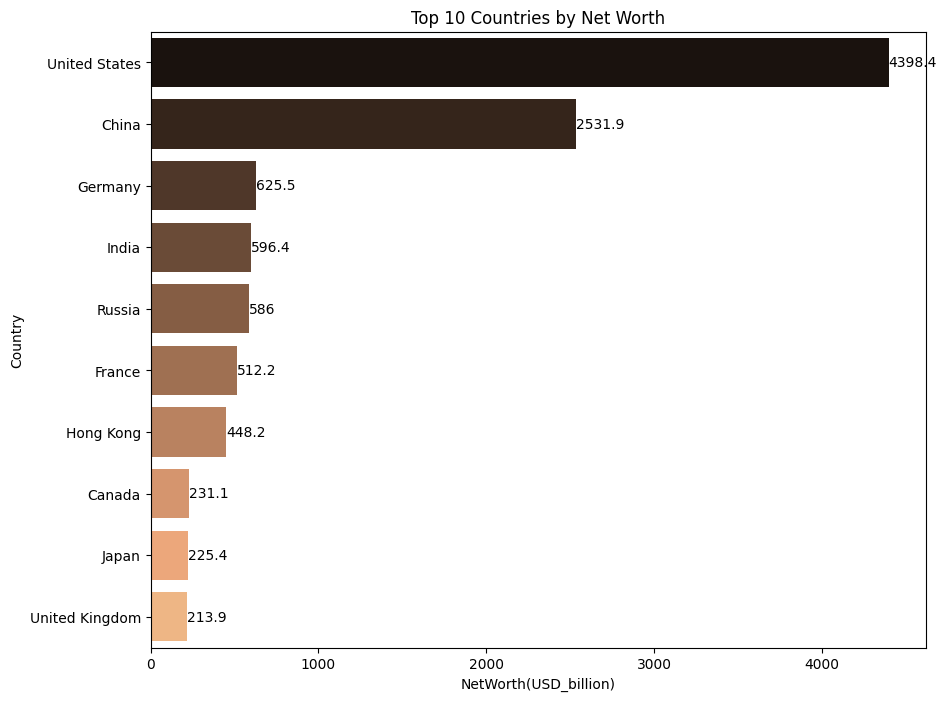

In [25]:
plt.figure(figsize=(10,8))
plt.title('Top 10 Countries by Net Worth')
# sn.barplot(y='Industry', x='NetWorth(USD_billion)', data= Top_10_Countries, palette= 'autumn')
ax = sn.barplot(y='Country', x='NetWorth(USD_billion)', data= Top_10_countries, palette= 'copper')
ax.bar_label(ax.containers[0])
plt.show()

### Top Continents by Net Worth

In [26]:
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_continent)

In [27]:
bill_data['Continent'] = bill_data['Country'].map(get_continent)
bill_data.drop('Rank', axis=1, inplace=True)

In [28]:
bill_data

,Name,NetWorth(USD_billion),Country,Source,Age,Industry,Continent
0,Jeff Bezos,177.0,United States,Amazon,57.0,Technology,NA
1,Elon Musk,151.0,United States,"Tesla, SpaceX",49.0,Automotive,NA
2,Bernard Arnault & family,150.0,France,LVMH,72.0,Fashion & Retail,EU
3,Bill Gates,124.0,United States,Microsoft,65.0,Technology,NA
4,Mark Zuckerberg,97.0,United States,Facebook,36.0,Technology,NA
...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,1.0,China,e-commerce,49.0,Technology,AS
2751,Zhang Yuqiang,1.0,China,Fiberglass,65.0,Manufacturing,AS
2752,Zhao Meiguang,1.0,China,gold mining,58.0,Metals & Mining,AS
2753,Zhong Naixiong,1.0,China,conglomerate,58.0,Diversified,AS


In [29]:
bill_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   2755 non-null   object 
 1   NetWorth(USD_billion)  2755 non-null   float64
 2   Country                2755 non-null   object 
 3   Source                 2755 non-null   object 
 4   Age                    2676 non-null   float64
 5   Industry               2755 non-null   object 
 6   Continent              2755 non-null   object 
dtypes: float64(2), object(5)
memory usage: 150.8+ KB


In [30]:
Top_Continents = billionaires(y= 'Continent', x= 'NetWorth(USD_billion)')
Top_Continents

,Continent,NetWorth(USD_billion)
3,NA,4767.2
1,AS,4719.2
2,EU,3015.8
5,SA,310.5
4,OC,192.6
0,AF,74.1
6,Unknown,4.7


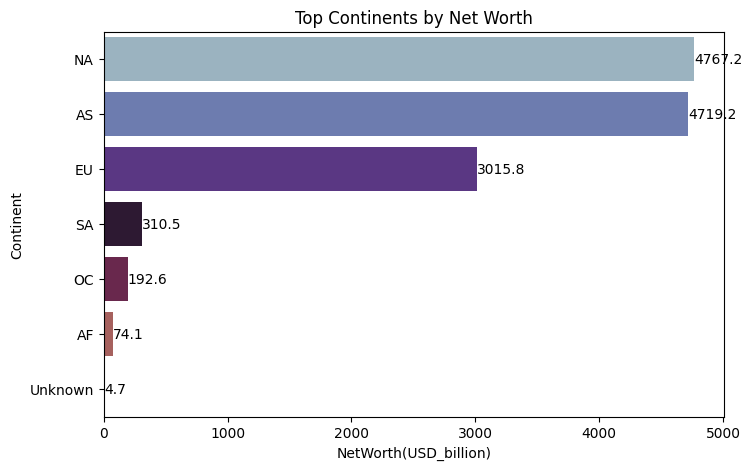

In [31]:
plt.figure(figsize=(8,5))
plt.title('Top Continents by Net Worth')
ax = sn.barplot(y= 'Continent', x= 'NetWorth(USD_billion)', data= Top_Continents, palette= 'twilight')
ax.bar_label(ax.containers[0])
plt.show()

In [32]:
# Top_10 = bill_data[bill_data['Continent'] == 'AS'].groupby('Industry')['NetWorth(USD_billion)'].sum().reset_index()
# Top_10 = Top_10.sort_values(by='NetWorth(USD_billion)', ascending = False)
# Top_10

def continent_billionaires(y='',x=''):
    Top_10 = bill_data[bill_data['Continent'] == 'AS'].groupby(y)[x].sum().reset_index()
    Top_10 = Top_10.sort_values(by=x, ascending = False).head(10)
    return Top_10

In [33]:
Top_AS_Industries = continent_billionaires(y= 'Industry', x= 'NetWorth(USD_billion)')
Top_AS_Industries

,Industry,NetWorth(USD_billion)
15,Technology,794.3
10,Manufacturing,718.3
2,Diversified,507.6
13,Real Estate,506.9
8,Healthcare,430.7
6,Food & Beverage,412.0
4,Fashion & Retail,277.4
5,Finance & Investments,191.7
0,Automotive,158.7
14,Service,146.6


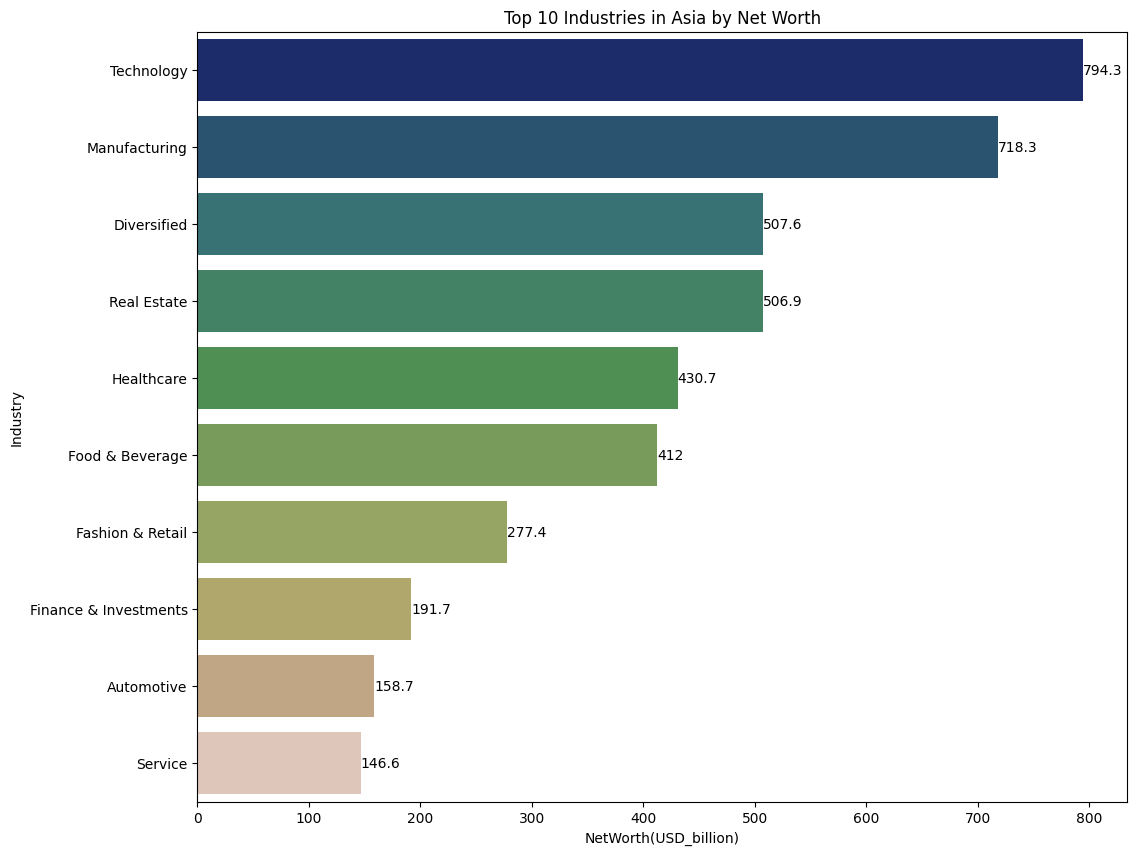

In [34]:
plt.figure(figsize=(12,10))
plt.title('Top 10 Industries in Asia by Net Worth')
ax = sn.barplot(y= 'Industry', x= 'NetWorth(USD_billion)', data=Top_AS_Industries, palette= 'gist_earth')
ax.bar_label(ax.containers[0])
plt.show()

In [35]:
def NA_billionaires(y='',x=''):
    Top_10 = bill_data[bill_data['Continent'] == 'NA'].groupby(y)[x].sum().reset_index()
    Top_10 = Top_10.sort_values(by=x, ascending = False).head(10)
    return Top_10

Top_NA_Industries = NA_billionaires(y= 'Industry', x= 'NetWorth(USD_billion)')
Top_NA_Industries

,Industry,NetWorth(USD_billion)
16,Technology,1469.4
5,Finance & Investments,939.2
4,Fashion & Retail,503.2
6,Food & Beverage,304.8
11,Media & Entertainment,295.7
0,Automotive,216.4
13,Real Estate,182.2
2,Diversified,155.6
8,Healthcare,122.6
3,Energy,115.4


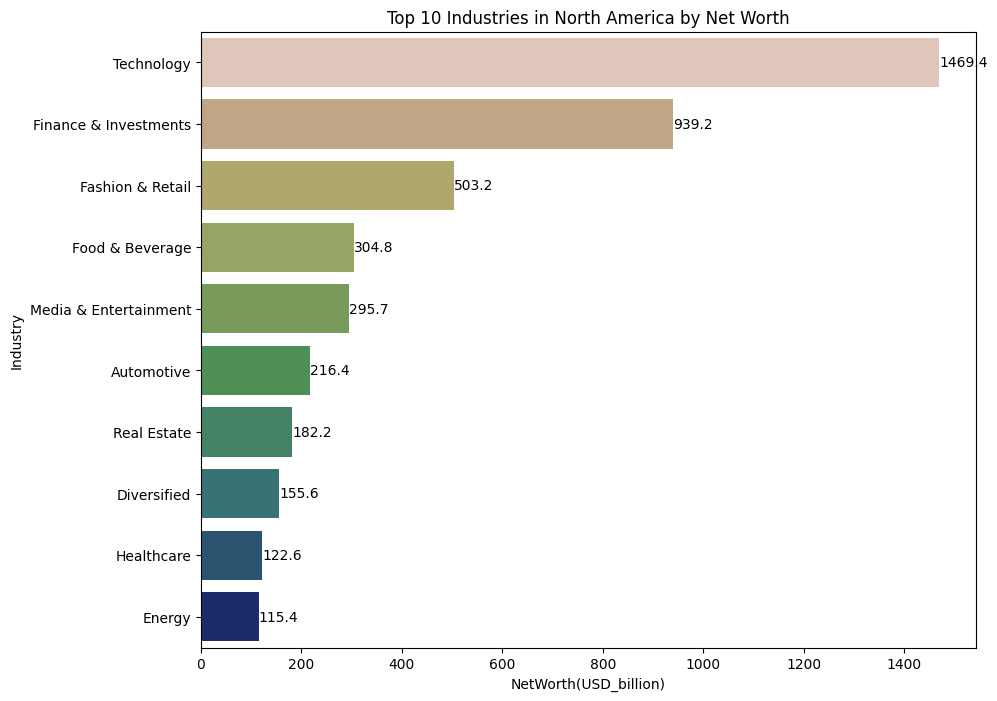

In [36]:
plt.figure(figsize=(10,8))
plt.title('Top 10 Industries in North America by Net Worth')
ax = sn.barplot(y= 'Industry', x= 'NetWorth(USD_billion)', data=Top_NA_Industries, palette= 'gist_earth_r')
ax.bar_label(ax.containers[0])
plt.show()

In [37]:
def EU_billionaires(y='',x=''):
    Top_10 = bill_data[bill_data['Continent'] == 'EU'].groupby(y)[x].sum().reset_index()
    Top_10 = Top_10.sort_values(by=x, ascending = False).head(10)
    return Top_10

Top_EU_Industries = EU_billionaires(y= 'Industry', x= 'NetWorth(USD_billion)')
Top_EU_Industries

,Industry,NetWorth(USD_billion)
4,Fashion & Retail,854.0
5,Finance & Investments,300.6
10,Manufacturing,258.0
6,Food & Beverage,248.4
8,Healthcare,200.6
12,Metals & Mining,198.0
3,Energy,188.4
2,Diversified,157.4
16,Technology,131.6
13,Real Estate,97.9


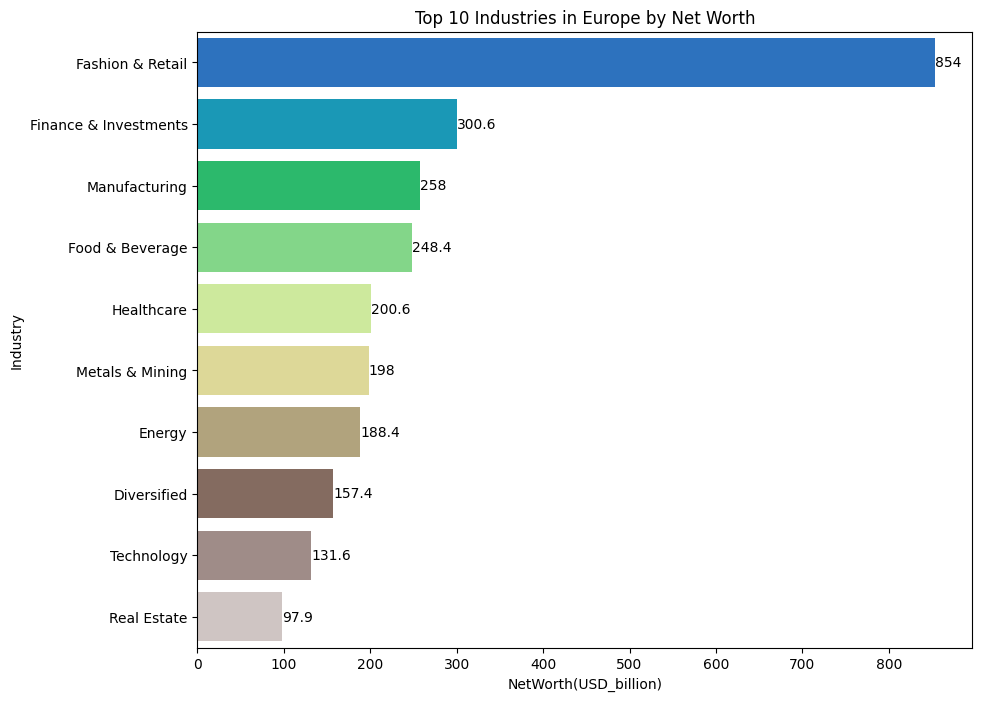

In [38]:
plt.figure(figsize=(10,8))
plt.title('Top 10 Industries in Europe by Net Worth')
ax = sn.barplot(y= 'Industry', x= 'NetWorth(USD_billion)', data=Top_EU_Industries, palette= 'terrain')
ax.bar_label(ax.containers[0])
plt.show()

In [39]:
def SA_billionaires(y='',x=''):
    Top_10 = bill_data[bill_data['Continent'] == 'SA'].groupby(y)[x].sum().reset_index()
    Top_10 = Top_10.sort_values(by=x, ascending = False).head(10)
    return Top_10

Top_SA_Industries = SA_billionaires(y= 'Industry', x= 'NetWorth(USD_billion)')
Top_SA_Industries

,Industry,NetWorth(USD_billion)
3,Finance & Investments,70.6
4,Food & Beverage,55.6
2,Fashion & Retail,37.0
5,Healthcare,36.8
9,Technology,30.2
8,Metals & Mining,28.7
0,Diversified,23.6
1,Energy,12.7
6,Manufacturing,9.9
7,Media & Entertainment,5.4


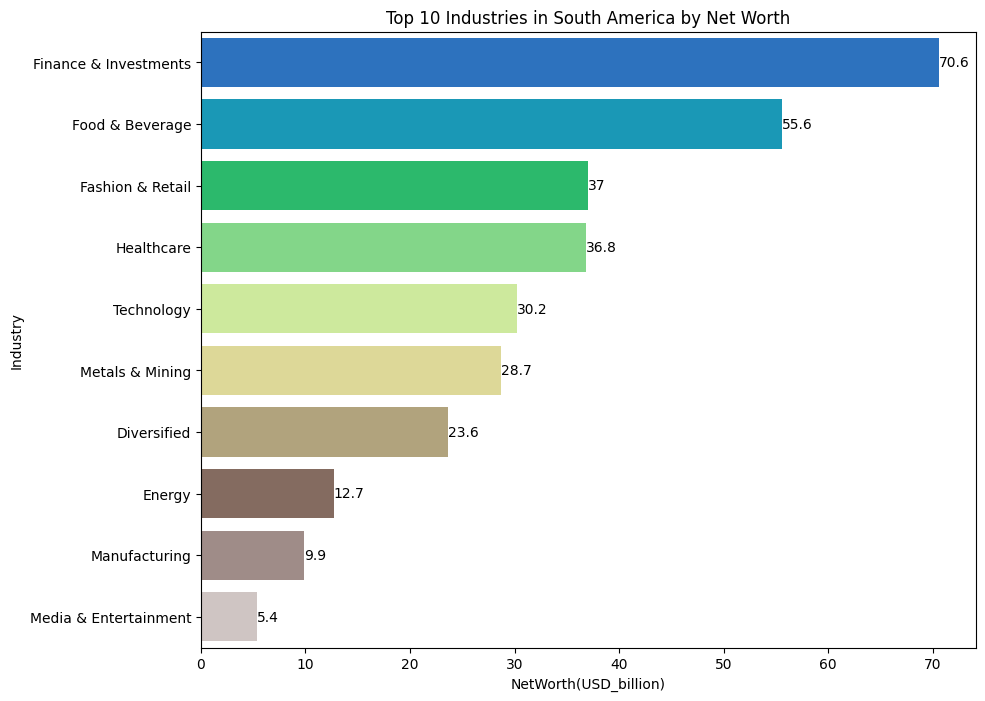

In [40]:
plt.figure(figsize=(10,8))
plt.title('Top 10 Industries in South America by Net Worth')
ax = sn.barplot(y= 'Industry', x= 'NetWorth(USD_billion)', data=Top_SA_Industries, palette= 'terrain')
ax.bar_label(ax.containers[0])
plt.show()

In [41]:
def OC_billionaires(y='',x=''):
    Top_10 = bill_data[bill_data['Continent'] == 'OC'].groupby(y)[x].sum().reset_index()
    Top_10 = Top_10.sort_values(by=x, ascending = False).head(10)
    return Top_10

Top_OC_Industries = OC_billionaires(y= 'Industry', x= 'NetWorth(USD_billion)')
Top_OC_Industries

,Industry,NetWorth(USD_billion)
9,Metals & Mining,56.0
11,Technology,31.2
10,Real Estate,28.8
3,Finance & Investments,23.4
7,Manufacturing,18.0
2,Fashion & Retail,12.4
4,Food & Beverage,4.3
1,Diversified,4.3
0,Automotive,3.5
8,Media & Entertainment,3.3


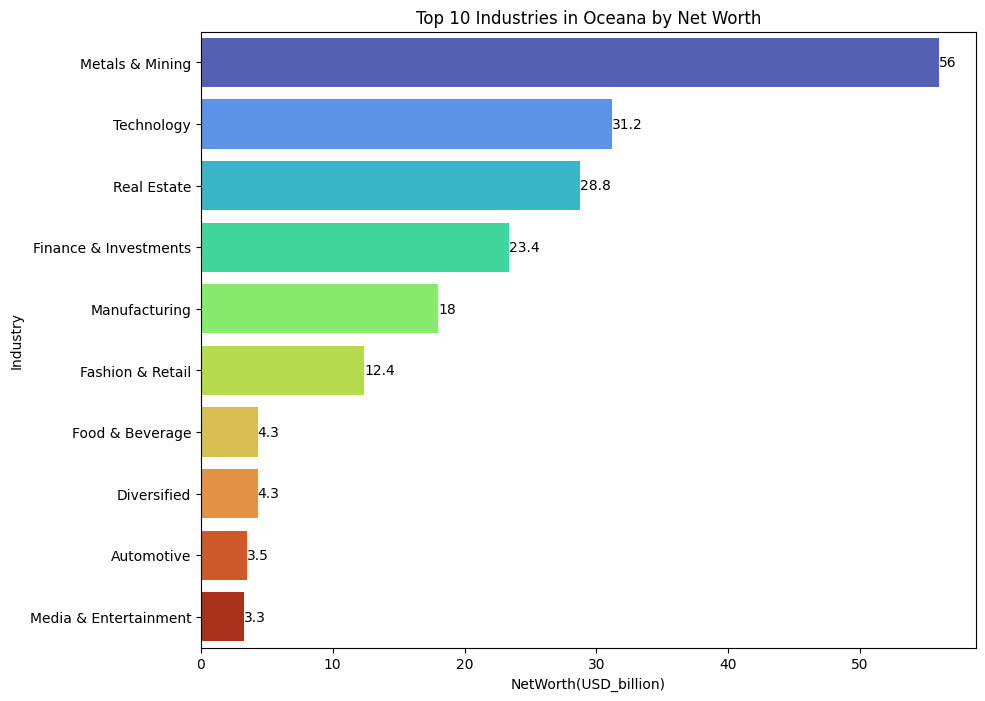

In [42]:
plt.figure(figsize=(10,8))
plt.title('Top 10 Industries in Oceana by Net Worth')
ax = sn.barplot(y= 'Industry', x= 'NetWorth(USD_billion)', data=Top_OC_Industries, palette= 'turbo')
ax.bar_label(ax.containers[0])
plt.show()

In [43]:
def AF_billionaires(y='',x=''):
    Top_10 = bill_data[bill_data['Continent'] == 'AF'].groupby(y)[x].sum().reset_index()
    Top_10 = Top_10.sort_values(by=x, ascending = False).head(10)
    return Top_10

Top_AF_Industries = AF_billionaires(y= 'Industry', x= 'NetWorth(USD_billion)')
Top_AF_Industries

,Industry,NetWorth(USD_billion)
1,Diversified,19.6
5,Manufacturing,11.5
7,Metals & Mining,10.9
2,Fashion & Retail,8.9
0,Construction & Engineering,8.3
4,Food & Beverage,4.8
8,Telecom,4.7
6,Media & Entertainment,3.0
3,Finance & Investments,2.4


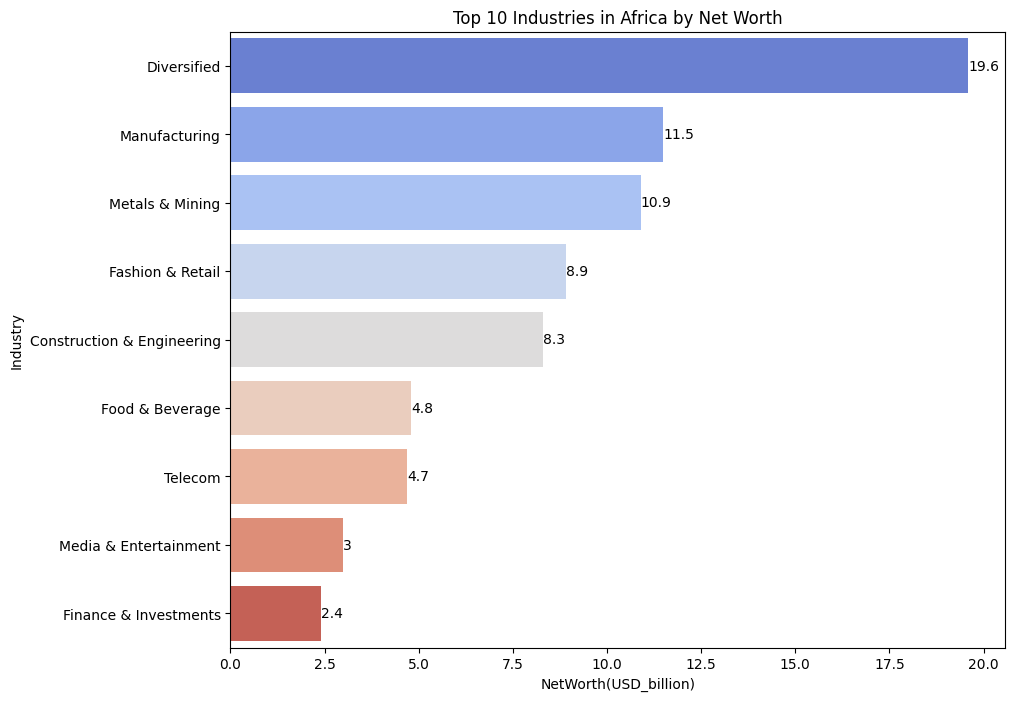

In [44]:
plt.figure(figsize=(10,8))
plt.title('Top 10 Industries in Africa by Net Worth')
ax = sn.barplot(y= 'Industry', x= 'NetWorth(USD_billion)', data=Top_AF_Industries, palette= 'coolwarm')
ax.bar_label(ax.containers[0])
plt.show()

In [45]:
#bill_data[['Country', 'Continent']]

In [46]:
#bill_data.groupby(['Country']).count()['Continent'].sort_values(ascending=False).reset_index()

In [47]:
#bill_data[bill_data['Continent'] == 'Unknown']